In [1]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow
from tensorflow import keras

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('assamese_compound'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:25]

['assamese_compound\\bdo\\label (1).jpg',
 'assamese_compound\\bdo\\label (10).jpg',
 'assamese_compound\\bdo\\label (100).jpg',
 'assamese_compound\\bdo\\label (101).jpg',
 'assamese_compound\\bdo\\label (102).jpg',
 'assamese_compound\\bdo\\label (103).jpg',
 'assamese_compound\\bdo\\label (104).jpg',
 'assamese_compound\\bdo\\label (105).jpg',
 'assamese_compound\\bdo\\label (106).jpg',
 'assamese_compound\\bdo\\label (107).jpg',
 'assamese_compound\\bdo\\label (108).jpg',
 'assamese_compound\\bdo\\label (109).jpg',
 'assamese_compound\\bdo\\label (11).jpg',
 'assamese_compound\\bdo\\label (110).jpg',
 'assamese_compound\\bdo\\label (111).jpg',
 'assamese_compound\\bdo\\label (112).jpg',
 'assamese_compound\\bdo\\label (113).jpg',
 'assamese_compound\\bdo\\label (114).jpg',
 'assamese_compound\\bdo\\label (115).jpg',
 'assamese_compound\\bdo\\label (116).jpg',
 'assamese_compound\\bdo\\label (117).jpg',
 'assamese_compound\\bdo\\label (118).jpg',
 'assamese_compound\\bdo\\label (119

In [2]:
#Id.remove('/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Rice_Citation_Request.txt')
#Id[:5]

ValueError: list.remove(x): x not in list

In [2]:
train=pd.DataFrame()
train=train.assign(filename=Id)

In [3]:
root_path='assamese_compound'
dd=os.listdir(root_path)
dd

['bdo', 'glo', 'klo', 'ndro', 'niojnjo', 'nisnso', 'pro', 'shro', 'sto', 'tno']

In [4]:
from pathlib import Path
from sklearn import preprocessing

dir_path = r'assamese_compound'
image_link=[]
for path in os.listdir(dir_path):
   image_link.append(path)
image_link = list(Path(r'assamese_compound').glob(r'**/*.jpg'))
image_name = [x.parents[0].stem for x in image_link]
image_label = preprocessing.LabelEncoder().fit_transform(image_name)

In [5]:
import numpy as np
df = pd.DataFrame()
df['link'] = np.array(image_link, dtype = str)
df['name'] = image_name
df['label'] = image_label

In [6]:
df

,link,name,label
0,assamese_compound\bdo\label (1).jpg,bdo,0
1,assamese_compound\bdo\label (10).jpg,bdo,0
2,assamese_compound\bdo\label (100).jpg,bdo,0
3,assamese_compound\bdo\label (101).jpg,bdo,0
4,assamese_compound\bdo\label (102).jpg,bdo,0
...,...,...,...
2324,assamese_compound\tno\390.jpg,tno,9
2325,assamese_compound\tno\391.jpg,tno,9
2326,assamese_compound\tno\392.jpg,tno,9
2327,assamese_compound\tno\393.jpg,tno,9


<Axes: >

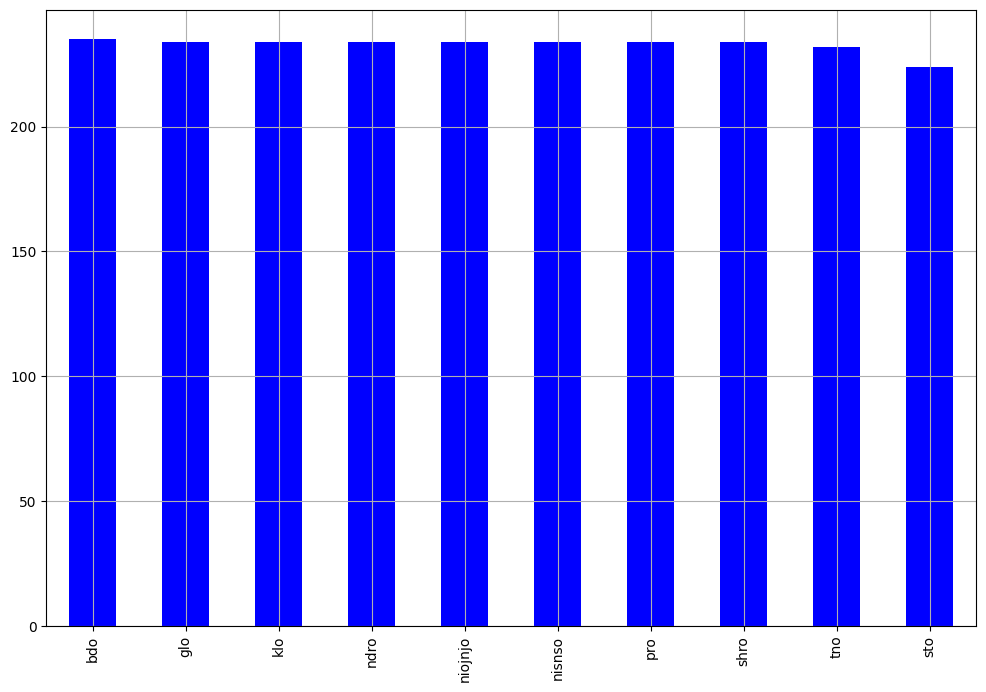

In [7]:
df.name.value_counts().plot(kind = 'bar', figsize = (12, 8), grid = True, color = 'blue')

In [8]:
df.shape

(2329, 3)

In [20]:
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory("assamese_compound",target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
valid_data=train_gen.flow_from_directory("assamese_compound",target_size=(224,224),batch_size=1,shuffle=True,subset='validation')
test_data=train_gen.flow_from_directory("assamese_compound",target_size=(224,224),batch_size=1,shuffle=True,subset='validation')

Found 1870 images belonging to 10 classes.
Found 459 images belonging to 10 classes.
Found 459 images belonging to 10 classes.


In [23]:
import tensorflow
from tensorflow import keras
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding="valid", activation="relu", input_shape=(224, 224,3)))
cnn.add(keras.layers.BatchNormalization())
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding="valid", activation="relu", input_shape=(224, 224,3)))
cnn.add(keras.layers.BatchNormalization())
cnn.add(keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(keras.layers.Flatten())

cnn.add(keras.layers.Dense(40, activation='relu'))
cnn.add(keras.layers.Dropout(rate=0.1, seed=100))

cnn.add(keras.layers.Dense(40, activation='relu'))
cnn.add(keras.layers.Dropout(rate=0.1, seed=100))

cnn.add(keras.layers.Dense(units=10, activation="sigmoid"))

In [24]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 batch_normalization_7 (Batc  (None, 109, 109, 32)     128       
 hNormalization)                                                 
                                                      

In [28]:
# 'adam' it is the version of gradient descent , which follow the adaptive learning
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history = cnn.fit(train_data, batch_size=512, epochs=20, validation_data=test_data, shuffle=True)

Epoch 1/20
59/59 [==============================] - 73s 1s/step - loss: 2.3028 - accuracy: 0.0941 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 2/20
59/59 [==============================] - 64s 1s/step - loss: 2.3027 - accuracy: 0.0909 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 3/20
59/59 [==============================] - 68s 1s/step - loss: 2.3027 - accuracy: 0.0930 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 4/20
59/59 [==============================] - 64s 1s/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 5/20
59/59 [==============================] - 63s 1s/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 6/20
59/59 [==============================] - 62s 1s/step - loss: 2.3027 - accuracy: 0.0904 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 7/20
59/59 [==============================] - 63s 1s/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 8/20
59/59 [==

In [29]:
#evaluate model
score= cnn.evaluate(test_data,verbose=0)
print("test loss",score[0])
print("test accuracy",score[1])

test loss 2.3024895191192627
test accuracy 0.10021786391735077


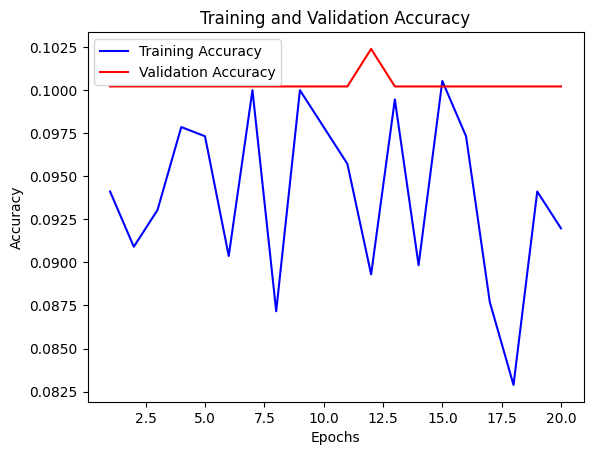

In [30]:

import matplotlib.pyplot as plt
# Retrieve accuracy values from training history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create x-axis values (epochs)
epochs = range(1, len(train_acc) + 1)

# Plot accuracy
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

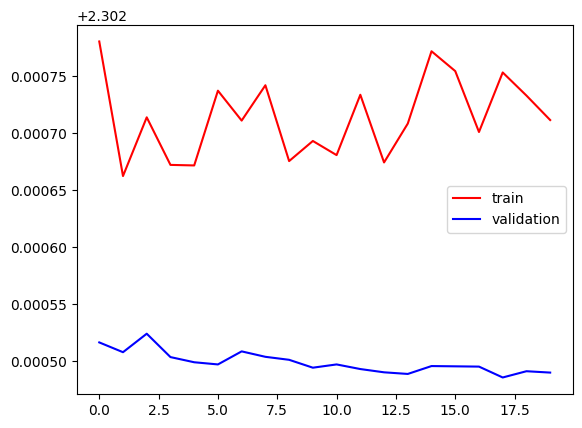

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [33]:
import cv2
import pandas as pd

import skimage
from random import randint
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [38]:
Image= cv2.imread('bdo/1.jpg')

In [41]:
image=PIL.Image.open('bdo/1.jpg')
image_array= np.array(image)
float_array = image_array.astype(np.float32)
print(image_array)
print(float_array.dtype)

[[255 249 255 ... 255 250 255]
 [248 255 235 ... 235 255 249]
 [255 236  23 ...  24 237 255]
 ...
 [255 232  26 ...  28 235 255]
 [255 255 231 ... 237 255 252]
 [254 247 255 ... 255 255 255]]
float32


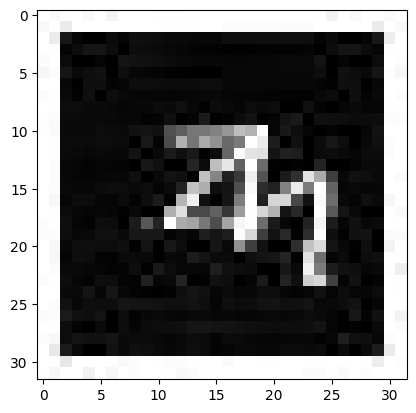

In [42]:
plt.imshow(Image)